# Simulacion del grado de propagacion de la Covid-19 Ecuador

Para realizar esta  simulacion se utilizar la libreria pygame para ello se debe instalar pygame

conda install -c cogsci pygame.


## Introduccion

En una epidemia, el parámetro fundamental, del que todo depende, es R0. Este símbolo se refiere al número de personas que, de media, cada infectado contagia antes de convertirse en inofensivo ( bien porque está en aislamiento, hospitalizado o ha muerto).
El valor R0 es fundamental, porque si es grande, el contagio se alarga más rápidamente. Si R0 es 2, y si el tiempo medio en el que se permanece contagiados es una semana, y hay 1.000 infectados, entonces después de una semana los infectados será 3.000 (los 1.000 del inicio más 2.000 nuevos contagiados). 
Si R0 es 5, después de una semana los infectados será 6.000 (los 1.000 de partida más 5.000 nuevos contagiados). A este punto, el ciclo vuelve a partir, con más o menos retraso, dependiendo de cuánto tiempo un nuevo infectado emplea en convertirse a sí mismo en contagioso.

Se reconstruye la dinámica de transmisión de una enfermedad inventada con cuatro escenarios diversos: 1. Sin ninguna medida de contención; 2. Con la cuarentena absoluta, aunque se «escapa» algún infectado; 3. Con formas de aislamiento y la distancia de seguridad entre personas que permiten salir solo a un ciudadano de cada cuatro; 4. Si sale solamente un ciudadano de cada ocho. En definitiva, solo con el aislamiento se puede contener la epidemia y lograr que la respuesta sanitaria sea eficaz. https://www.washingtonpost.com/graphics/2020/world/corona-simulator/

Entonces, el número reproductivo (R0): Este valor representa el número promedio de personas que un individuo infectado puede contagiar. Para el COVID-19, se estima que se encuentra entre 1.4 y 4 (Qun Li, 2020). Ademas segun  estimaciones de la OMS la probabilidad de fallecimiento es de 1.2% - 4.2%  segun https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30243-7/fulltext




In [ ]:
from random import randrange
import pygame

#Parametros de inicio
PROBA_MUERTE = 4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 56.43 # Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 25 # Tiempo de un dia en milisegundos
nb_rows = 100 #Numero de filas
nb_cols = 100 #Numero de columnas

global display, myfont, states, states_temp

WHITE = (255, 255, 255)
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2]

def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[5][5] = 10
it = 0 # Iteraciones
total_muerte = 0
vacunar()

pygame.init()
pygame.font.init()
display=pygame.display.set_mode((1500,1000),0,32)
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")
font=pygame.font.SysFont('Calibri', 40)
display.fill(WHITE)

while True:
    pygame.time.delay(SIMULACION_SPEED)
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy()
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10:
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE:
                        states_temp[x][y] = -1
                    else:
                        states_temp[x][y] = 1
                if state >= 10 and state <= 20:
                    if randrange(99) < PROBA_INFECT:
                        neighbour = get_vecinos(x, y)
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0:
                            states_temp[x2][y2] = 10
        states = states_temp.copy()
        total_muerte = contar_muertes()
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50))
    textsurface = font.render("Total muertes: "+ str(total_muerte), True, (255,160,122))
    display.blit(textsurface, (250, 30))

    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE
            if states[x][y] == 1:
                color = GREEN
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50)
            if states[x][y] == -1:
                color = BLACK
            pygame.draw.circle(display, color, (100 + x * 12 + 1, 100 + y * 12 + 1), 3)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 0))

    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE:
            pygame.quit()
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[50][50] = 10
            it = 0
            total_muerte = 0
            vacunar()
            
    pygame.display.update()


En concecuencia, generar 5 simulaciones: 
1. R0 obtenidos de la prediccion del SIR (Trabajo anterior)
2. Predecir que va a ocurrir la proxima semana.
3. El valor 4, el cual representaría el peor de los casos. 
4. El valor 1.4 en el mejor de los casos
5. R0 sin las medidas tomadas


Finalmente, agregar el numero de dias transcurridos, personas recuperadas y generar la curva SIR de las simulaciones.


Plantee y realize mejoras al modelo de simulacion.

1 R0 obtenidos de la prediccion del SIR (Trabajo anterior)
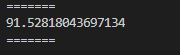

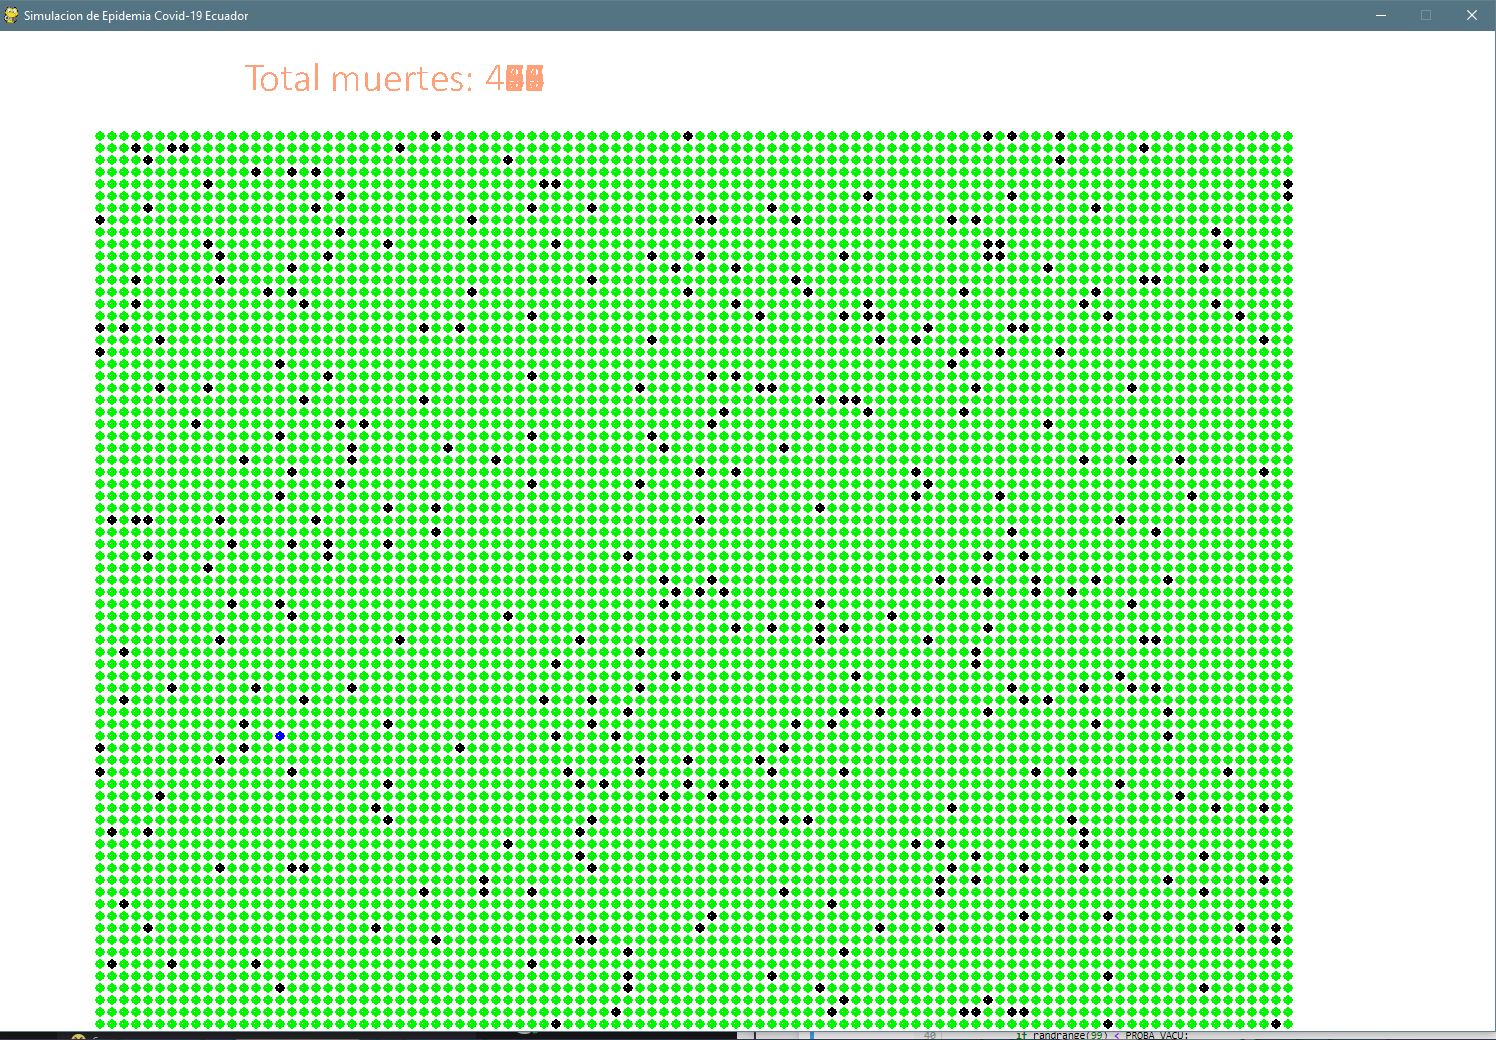


2 Predecir que va a ocurrir la proxima semana.

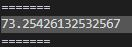

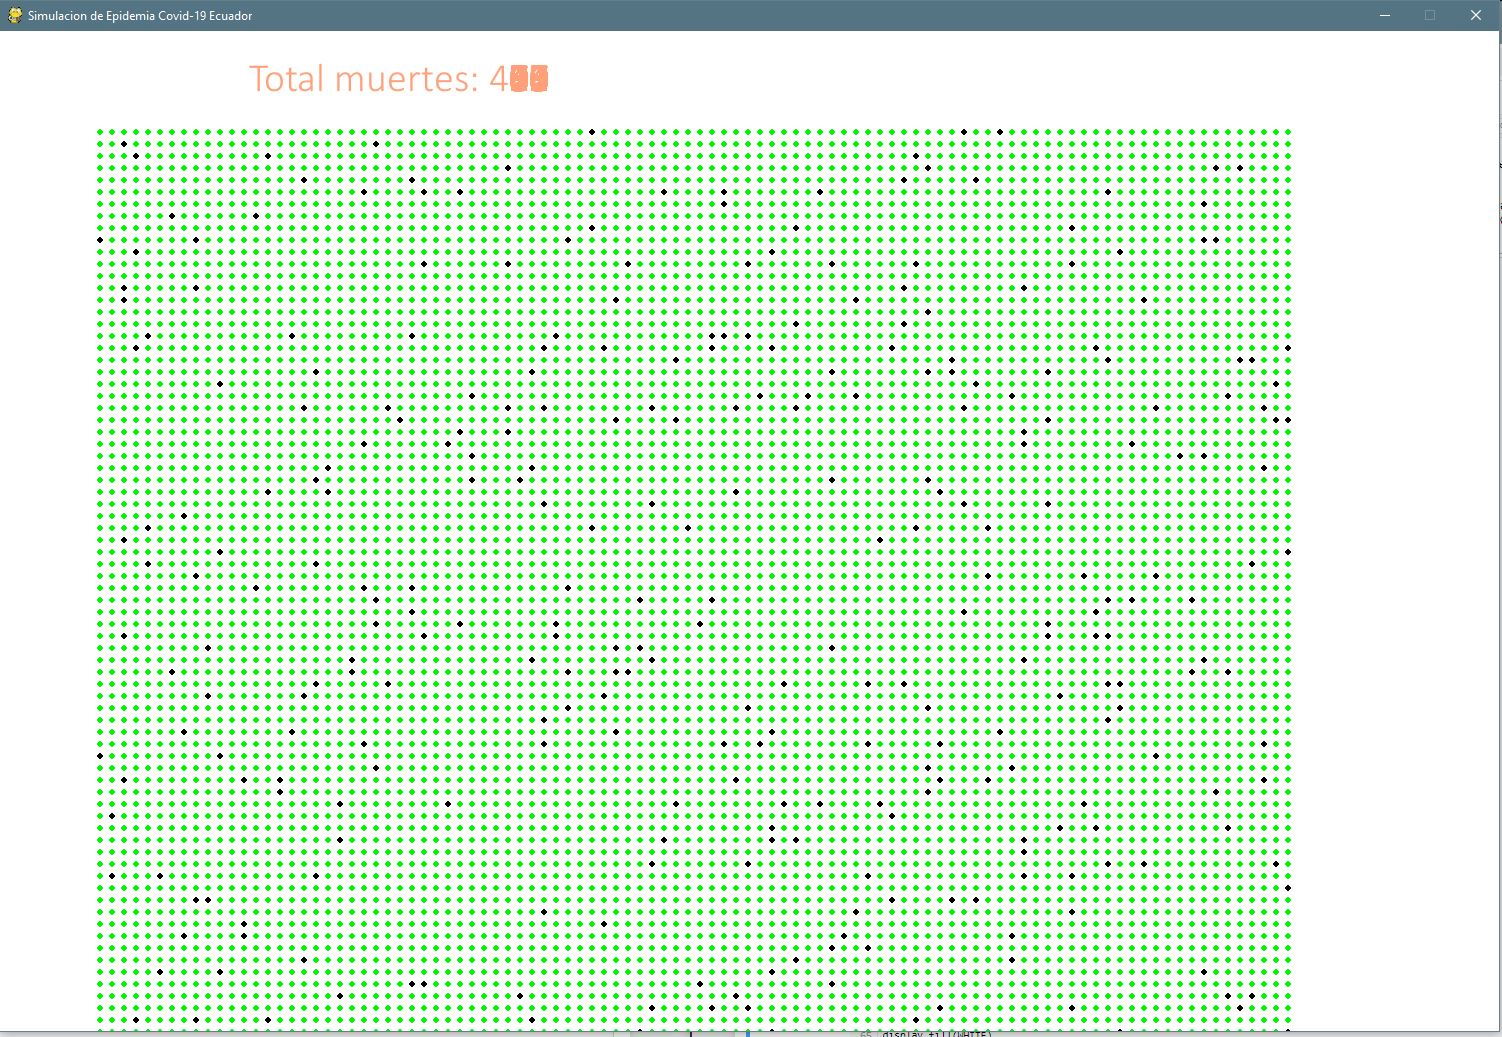


3 El valor 4, el cual representaría el peor de los casos.

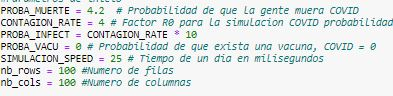

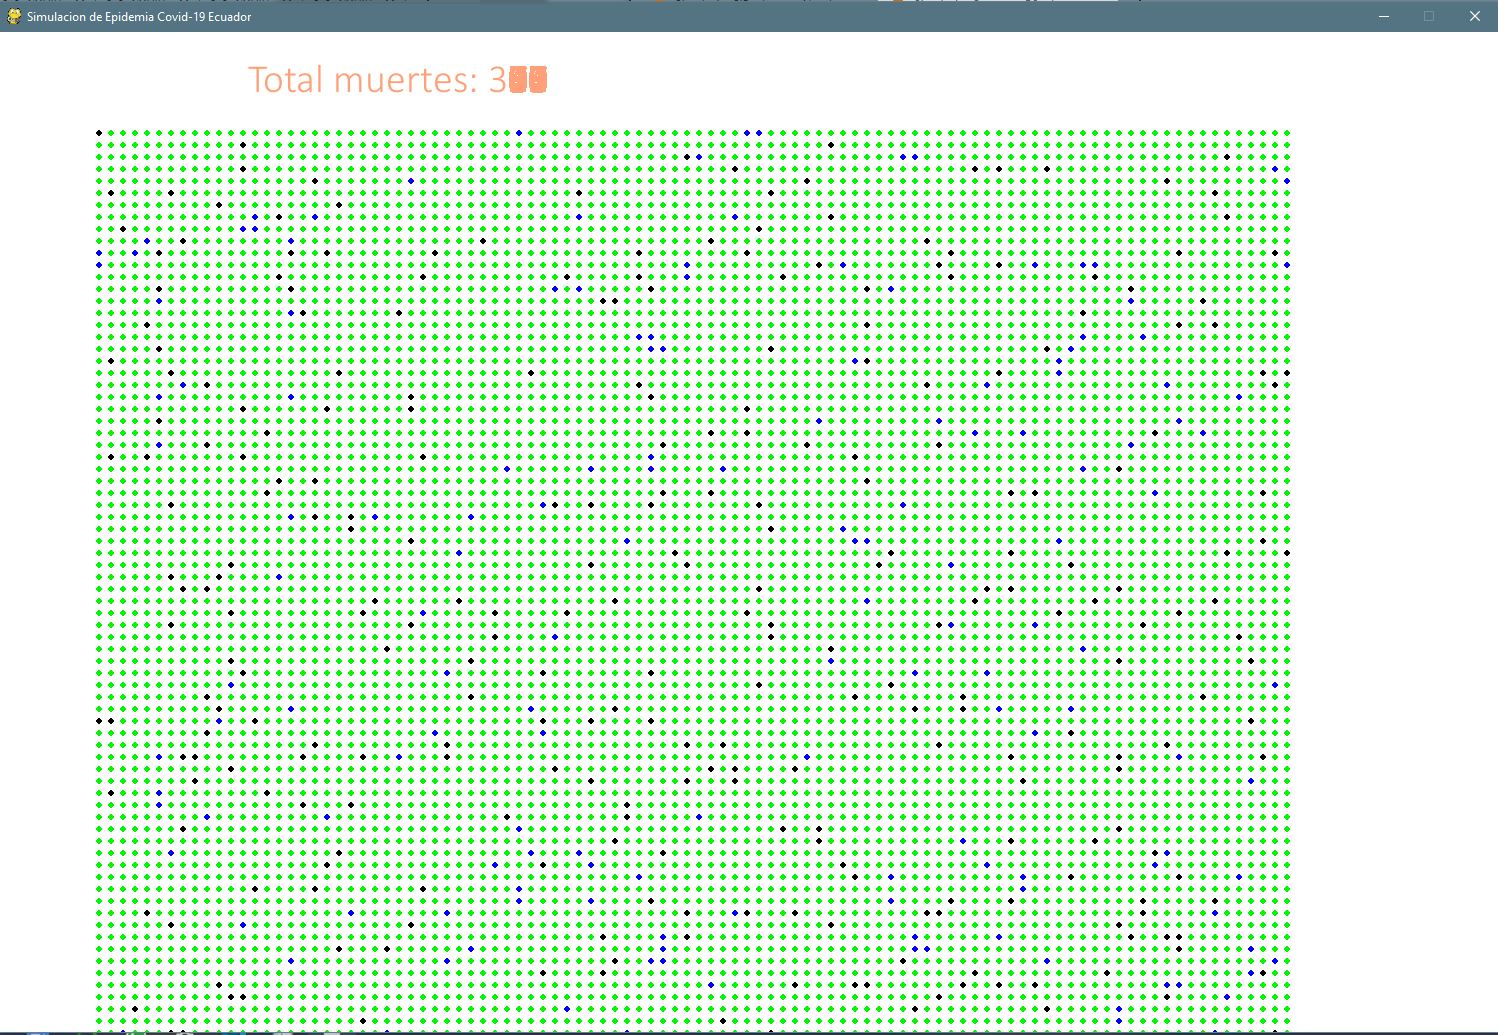


4 El valor 1.4 en el mejor de los casos

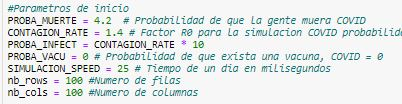

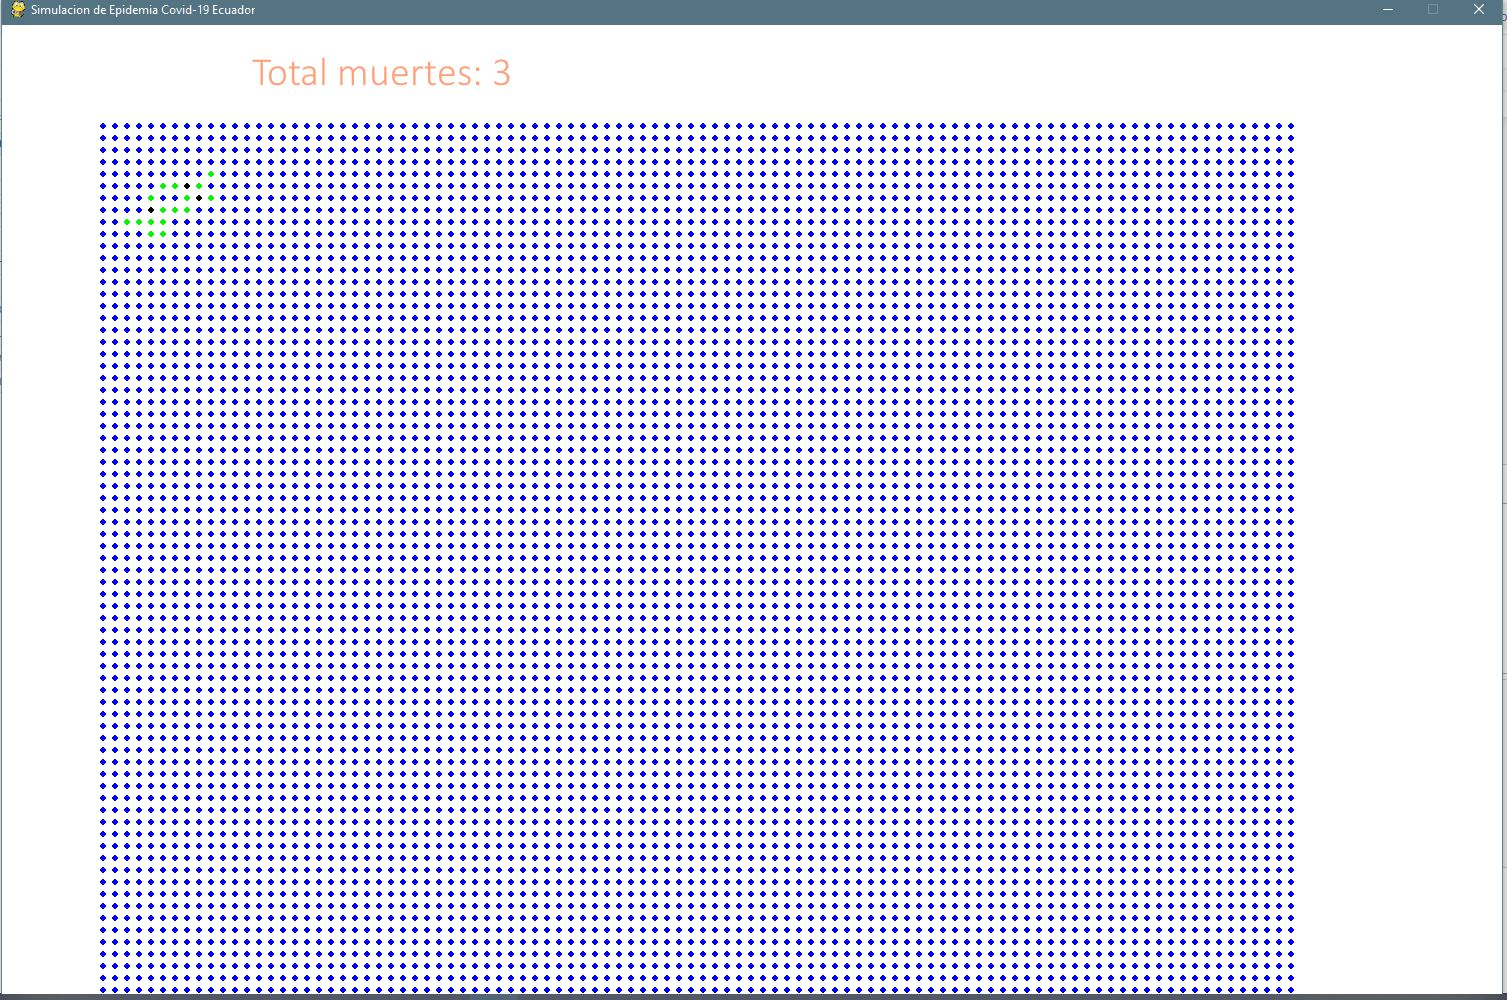


5 R0 sin las medidas tomada}

CuareNtena

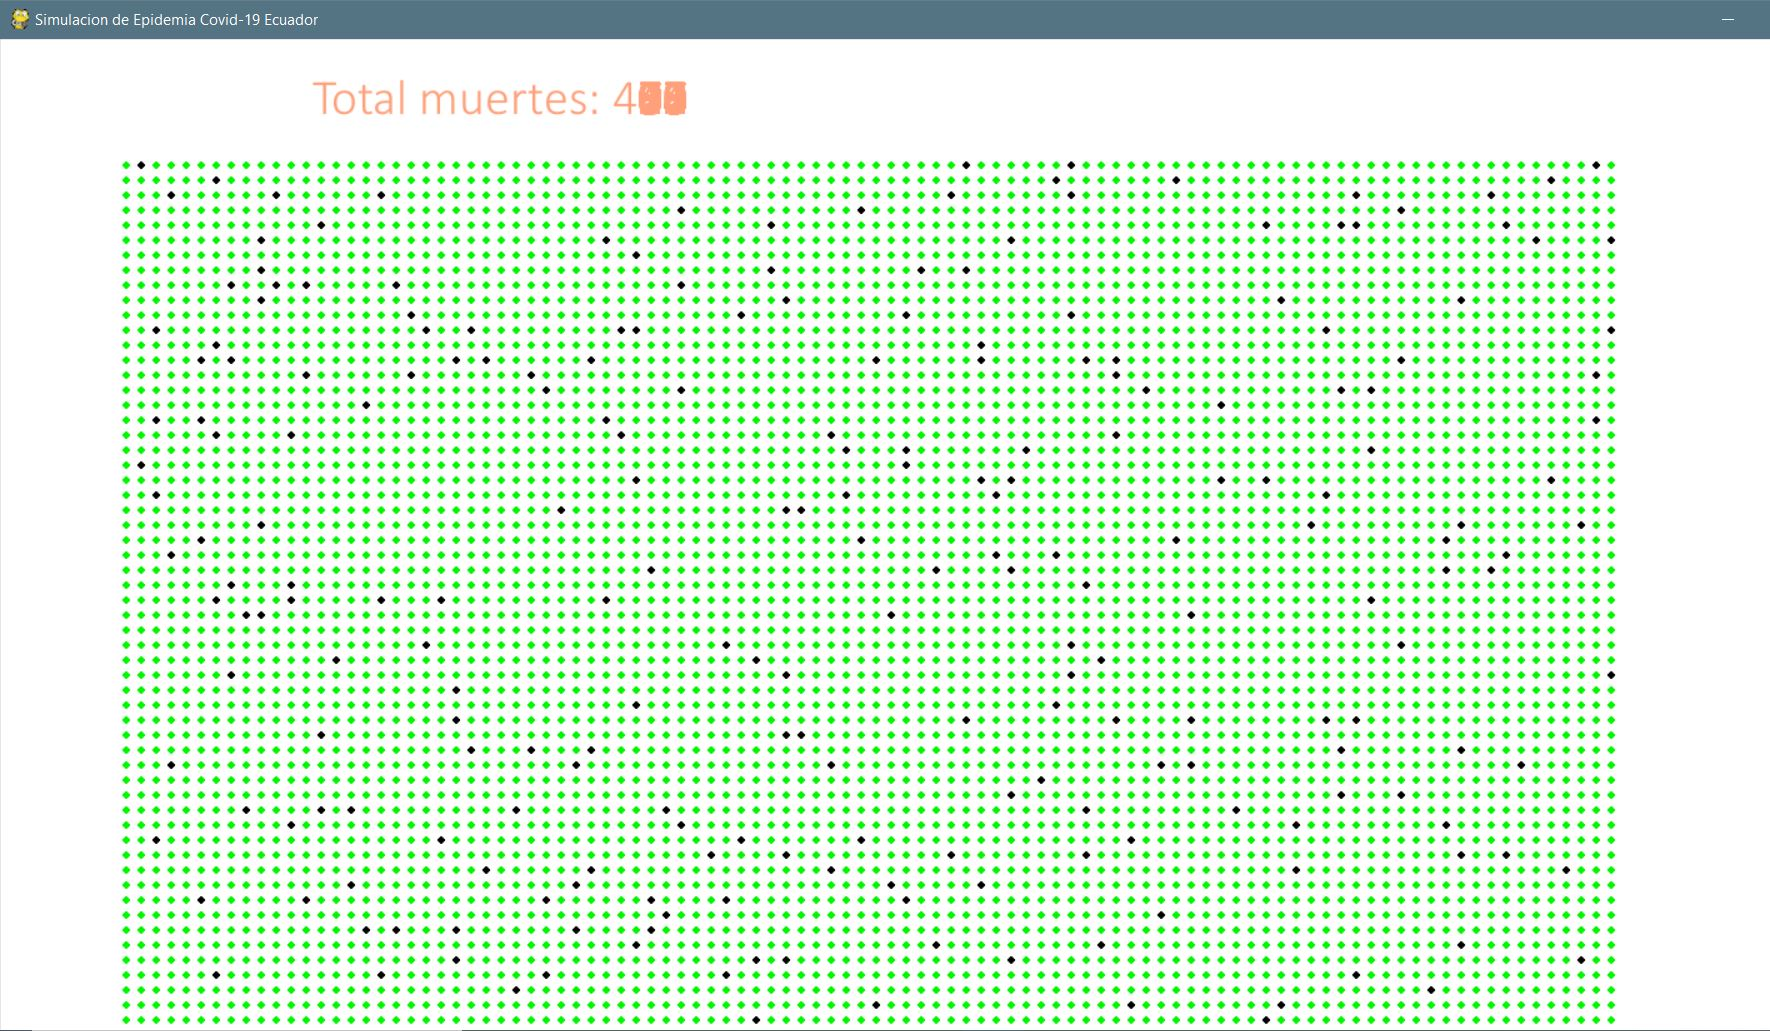

sin Cuaterenta

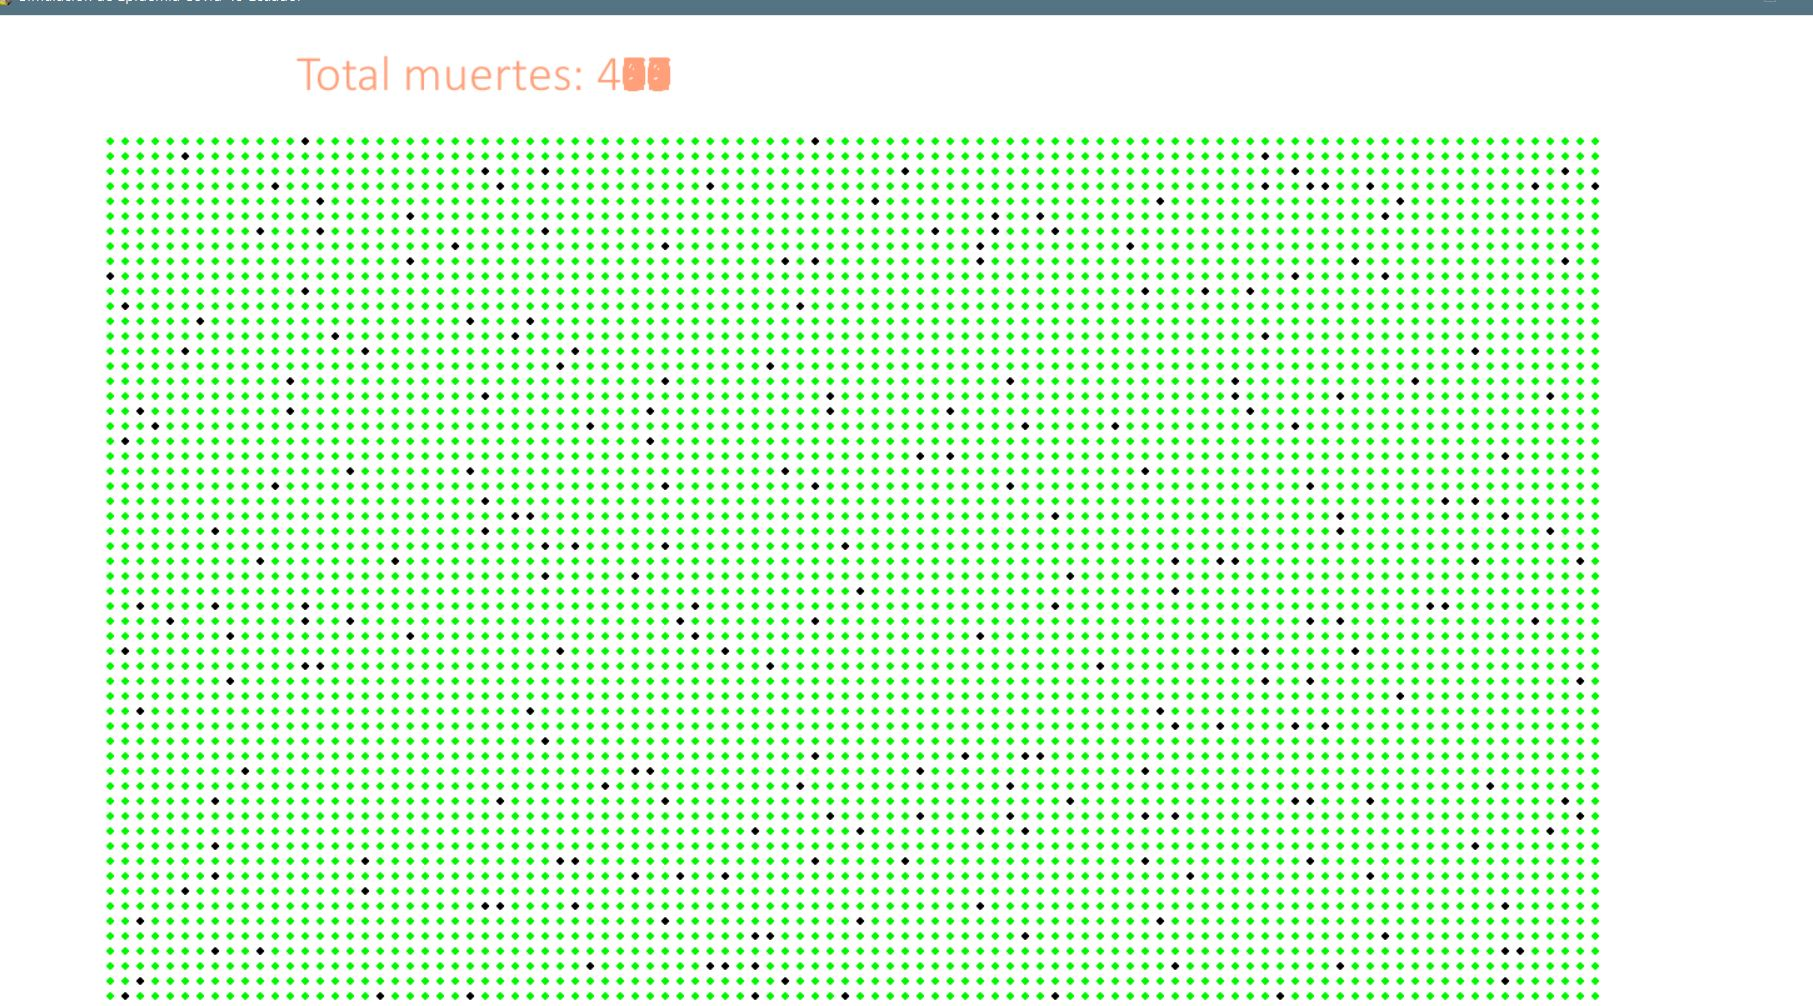

## Analisis

con referente a los resukltados el modelos para la simulacion de contagiados nos puede darun agran idea de como el virus se puede propagar en grnades cantidades de personas dando una media de muertes de un 450 por cada 10000 habitantes lo cual si es suma cifra impresionante 


## Conclusiones

como parte del analisisde las muertes podemos decir que esta esta en un nivel preocupante debido a que hya un crecimiento execvo en la muerte y tenerun promedio de 400 muertes es muy preocupandte y si la cifra aumenta de contagiados hay muchas formas de que esto se descontrole


## Opinion
     como opinon cabe acotar que estos son datos sintener un cuwenta los 5000 muestos q esxisten en el guayas ya q salieron fuera del contexto del coronavirus pero si por complicaciones respiratoruias esto queire decir que lña ruva de muertes es mucho mas grande lo que quere decir que esta simulacion podria ser peor lo que seguramente pasara en los proxmimos dias en el páis


# Referencias
- http://code.intef.es/simulamos-una-epidemia-virica/
- 